### Sphere of influence in celestial mechanics

Given a N-body system with a dominating body, the equation $$\bold{ \ddot r_i} = G \sum_{j \neq i} \frac{m_i m_j}{r_{ij}^3} \bold{r_{ij}} $$
can be rewritten by using as origin of the RF the main body and give $$\bold{ \ddot r_i} + G(m_N+m_i)\frac{\bold{r_{i}}}{r_i^3}= G \sum_{j \neq i} m_j \left(  \frac{\bold{r_j} - \bold{r_i} }{r^3_{ij}} - \frac{\bold{r_j}}{r^3_{j}} \right) $$ 
In a N body system, where the 2-body acceleration given by a body is greater then the perturbation term, this defines the border of the sphere of influence. In a 2-body sistem, for the smaller body is given by $$ r_{SI}= \left( \frac{m_1}{m_2} \right)^{0.4} r_{12}$$

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

The system is defined by taking a third body of smaller mass as a probe and studying the effects on this body

In [92]:
m1, m2, m = 1e0, 5e-3, 0
r1, r2 = np.array([0,0]), np.array([1,0]) #Positions in the plot RF
G = 1 #It is not used as I take the ratio between the two accelerations

def a_2b(m_N, m, r_N, r): #r is the position of m 
  r = np.array(r) 
  r = r-r_N #Rescaling the positions in the m_N RF
  return G*(m_N+m)*(r)/(norm(r))**3
  
def a_p(m_j, r_N, r_j, r): #r is the position of m 
  r = np.array(r) 
  r_j = r_j-r_N #Rescaling the positions in the m_N RF
  r = r-r_N
  return G*m_j*((r_j-r)/(norm(r_j-r))**3 - r_j/(norm(r_j))**3)

def SI2(x,y):
  r = np.array([x,y])
  a_2b_1 = a_2b(m1, m, r1, r)
  a_p_1 = a_p(m2, r1, r2, r)
  a_2b_2 = a_2b(m2, m, r2, r)
  a_p_2 = a_p(m1, r2, r1, r)
  
  return F(norm(a_p_2)/norm(a_2b_2)-norm(a_p_1)/norm(a_2b_1))




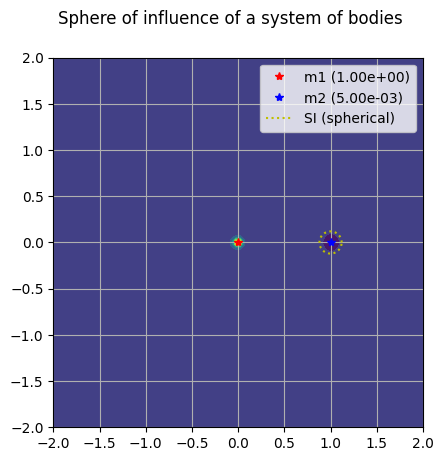

In [93]:
x = np.linspace(-2,2, 1000)
y = np.linspace(-2,2, 1000)

mX, mY = np.meshgrid(x,y)




SI2 = np.vectorize(SI2)

x, y = np.linspace(-2,2, 100), np.linspace(-2,2, 100)
mx, my = np.meshgrid(x,y)
D = SI2(mx, my)

fig, ax = plt.subplots()
fig.suptitle('Sphere of influence of a system of bodies')
ax.contourf(mx, my,D)
ax.plot(r1[0], r1[1], 'r*', label = f'm1 ({m1:.2e})')
ax.plot(r2[0], r2[1], 'b*', label = f'm2 ({m2:.2e})')

theta = np.linspace(0, 2*np.pi, 1000)
r = (m2/m1)**0.4
ax.plot(r2[0]+r*np.cos(theta), r2[1]+r*np.sin(theta), 'y:', label= 'SI (spherical)')

ax.set_aspect('equal')
ax.grid()
ax.legend()

In [94]:
print(SI2(1.1,0))

0.28252973000341064
